# 데이터 준비

In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
import matplotlib.pyplot as plt

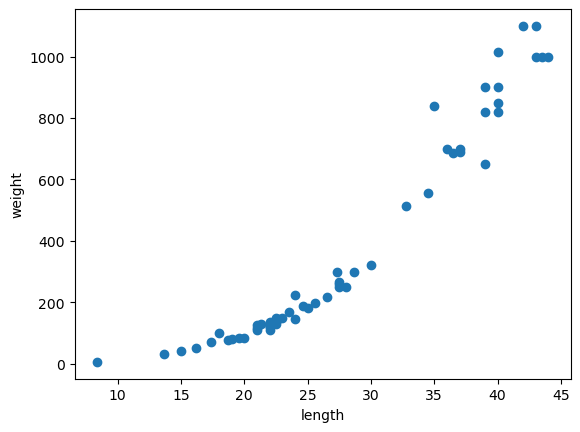

In [4]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [6]:
# perch_length가 1차원 배열이라 결과들도 다 1차원 배열임
# 차원 바꾸는 예시
tmp = np.array([1,2,3,4])
print(tmp.shape)
print(tmp)
print("------------------------------")
tmp = tmp.reshape(2,2)
print(tmp.shape)
print(tmp)

(4,)
[1 2 3 4]
------------------------------
(2, 2)
[[1 2]
 [3 4]]


In [7]:
# -1 : NumPy가 데이터 크기에 맞춰 자동으로 행(row)의 개수를 결정
train_input = train_input.reshape(-1,1)  
test_input = test_input.reshape(-1,1)

print(train_input.shape, test_input.shape)
# print(train_input)

(42, 1) (14, 1)


# 결정계수 R^2

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [9]:
knr = KNeighborsRegressor()         # 모델 생성
knr.fit(train_input, train_target)  # 훈련

KNeighborsRegressor()

In [10]:
# 결정계수
# R^2 = 1 - (   (타깃-예측)^2의 합 - (타깃-평균)^2의 합   )

knr.score(test_input, test_target)

0.992809406101064

In [11]:
# 타깃과 예측의 절댓값 오차를 평균하여 반환

from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)    # 테스트세트에 대한 예측 만들기
mae = mean_absolute_error(test_target, test_prediction)  # 오차 
print(mae)

19.157142857142862


# 과대적합과 과소적합

In [12]:
knr.score(train_input, train_target)

0.9698823289099254

In [13]:
knr.score(test_input, test_target)   # 검증세트가 더 높음...

0.992809406101064

In [14]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
knr.score(train_input, train_target)

0.9804899950518966

In [15]:
knr.score(test_input, test_target)

0.9746459963987609

# 예측

In [16]:
knr.n_neighbors = 5

knr.fit(train_input, train_target)
knr.score(train_input, train_target)

0.9698823289099254

In [17]:
# 예측해야하는 길이가 22일때 무게를 구해봄

distances, indices = knr.kneighbors([[22]])

In [29]:
indices

array([[ 1, 38, 33,  9, 11]], dtype=int64)

In [30]:
train_input[indices]

array([[[22.],
        [22.],
        [22.],
        [22.],
        [22.]]])

In [32]:
train_target[indices].mean()

123.0

Text(0, 0.5, 'weight')

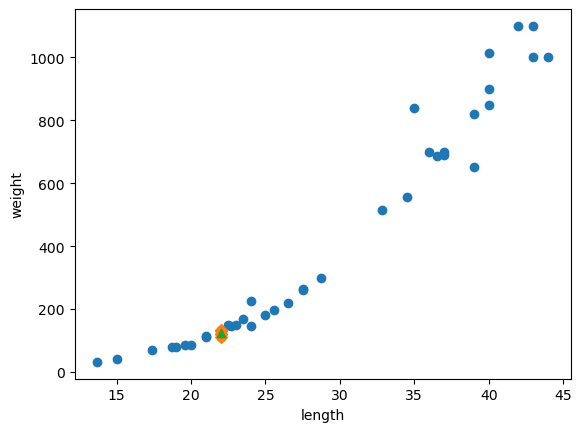

In [38]:
import seaborn as sns

plt.scatter(train_input[:], train_target[:])
plt.scatter(train_input[indices[:]], train_target[indices[:]], marker='D')  #가장 가까운 이웃의 판단 
plt.scatter(22, 123, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

## 스케일링 해봄 - 할 필요없음 